# 다양한 분류(classification) 방법론과 분류성능 비교평가

- Supervised learning 방법

    - Logistic Regression
    - Naive Baysian
    - k-Nearest Neighbor
    - Support Vector Machine

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#visualization

import matplotlib.pyplot as plt
import seaborn as sns

import warnings # ignore warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("../resource/W5/heartDisease.csv")

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Description of the dataset

* age-age in years

sex-(1 = male; 0 = female)

* cp-chest pain type

* trestbps-resting blood pressure (in mm Hg on admission to the hospital)

* chol-serum cholestoral in mg/dl

* fbs-(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

* restecg-resting electrocardiographic results

* thalach-maximum heart rate achieved

* exang-exercise induced angina (1 = yes; 0 = no)

* oldpeak-ST depression induced by exercise relative to rest

* SLOPE (the slope of the peak exercise ST segment)

* CA (number of major vessels (0-3) colored by flourosopy)

* THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)

* TARGET (1 or 0)

In [4]:
#check the shape of the dataset
data.shape

(303, 14)

In [5]:
#check the datatypes of the dataset
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#check the null value
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# Analyzing the dataset

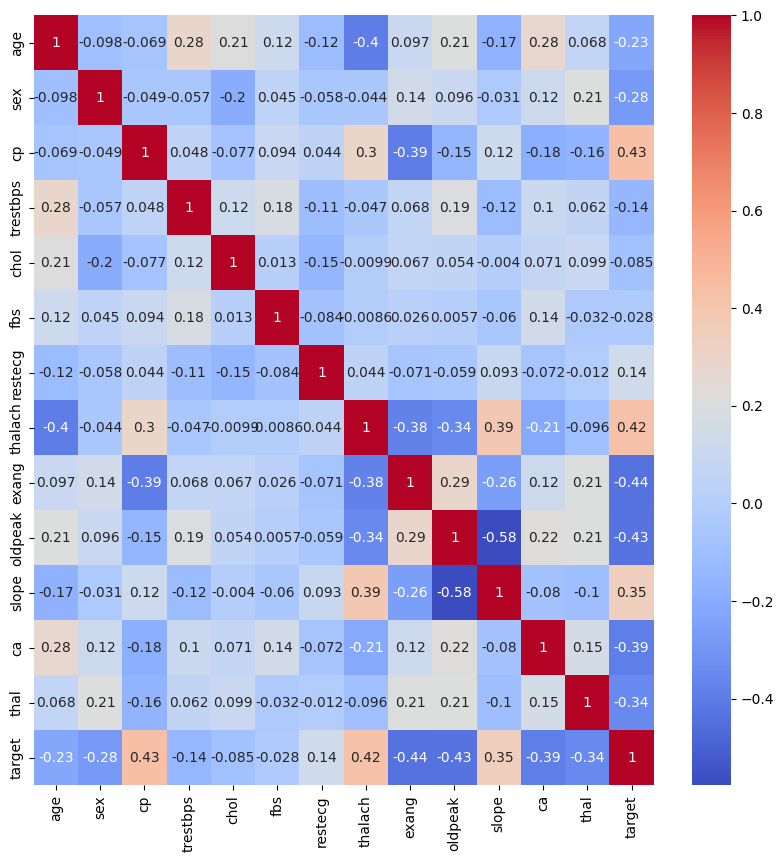

In [10]:
corr=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

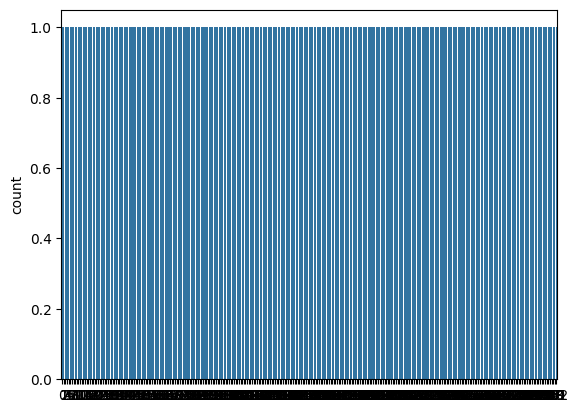

In [11]:
sns.countplot(data.target)
plt.show()

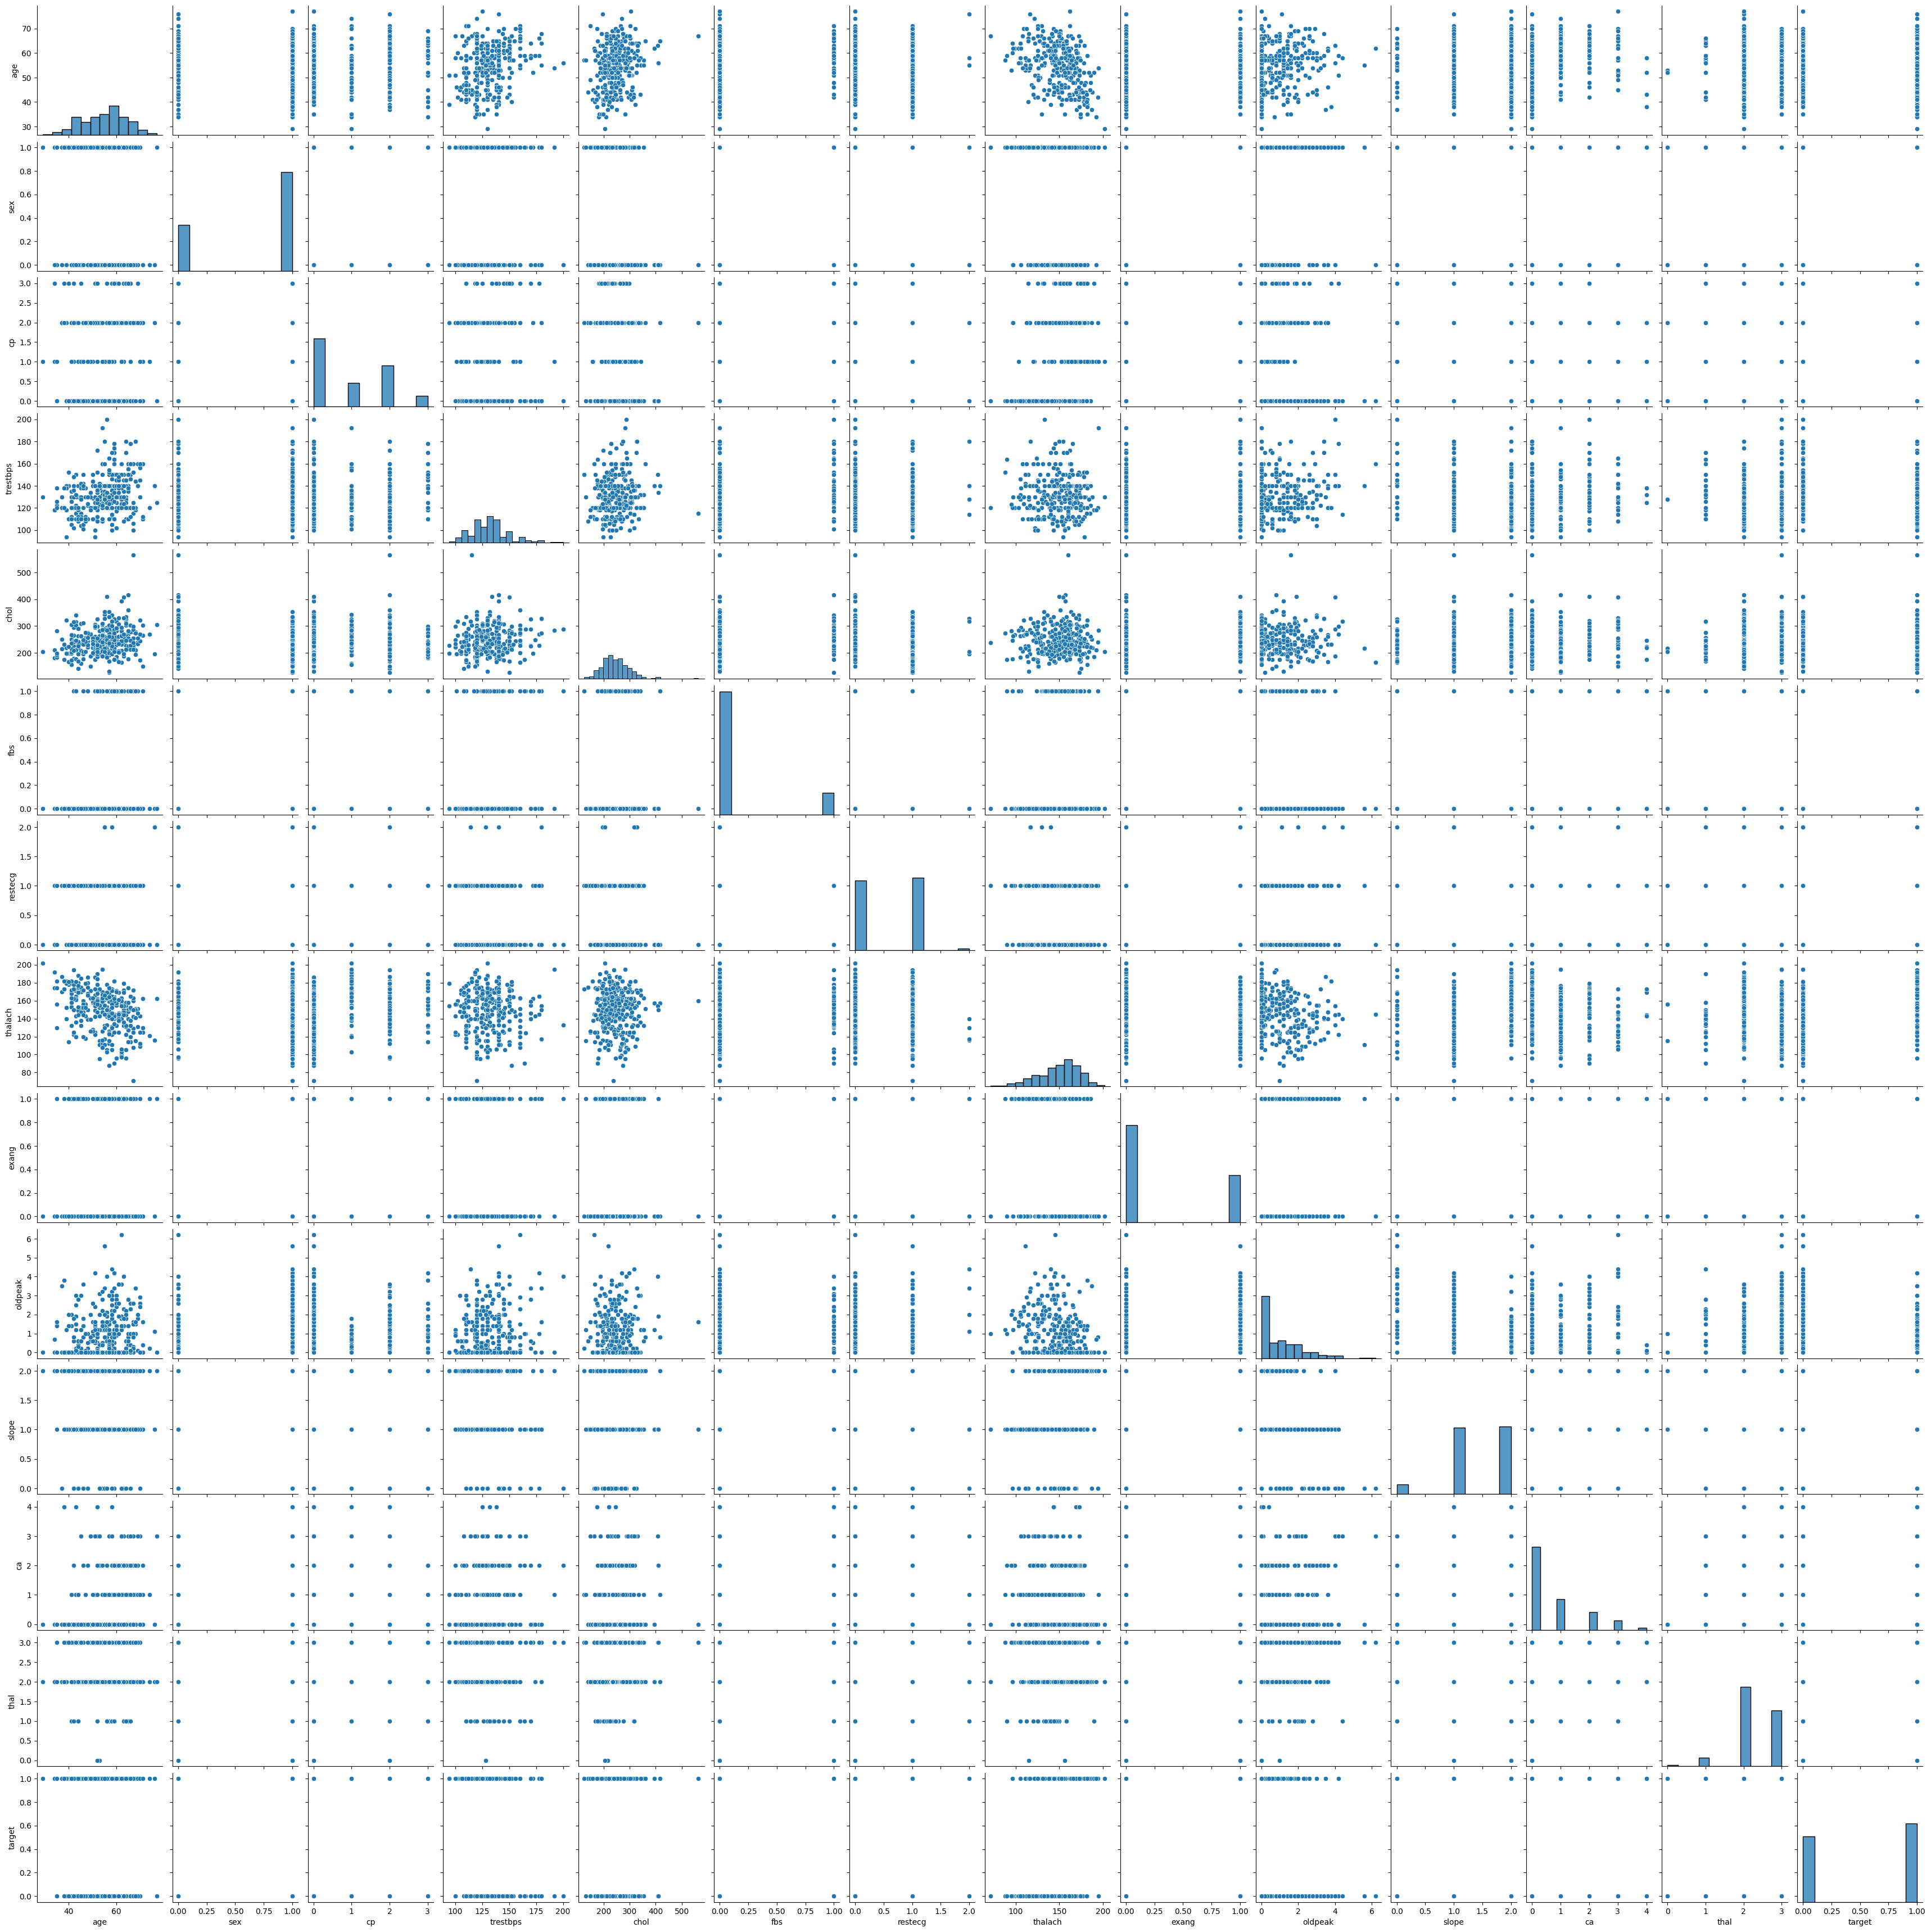

In [12]:
sns.pairplot(data)
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


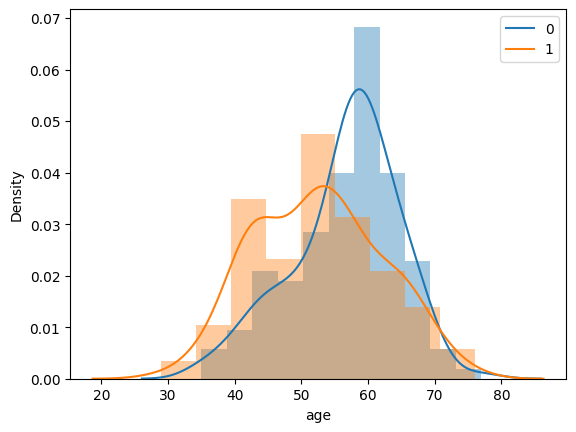

In [13]:
sns.distplot(data.age[data.target==0])
sns.distplot(data.age[data.target==1])
plt.legend(['0','1'])
plt.show()

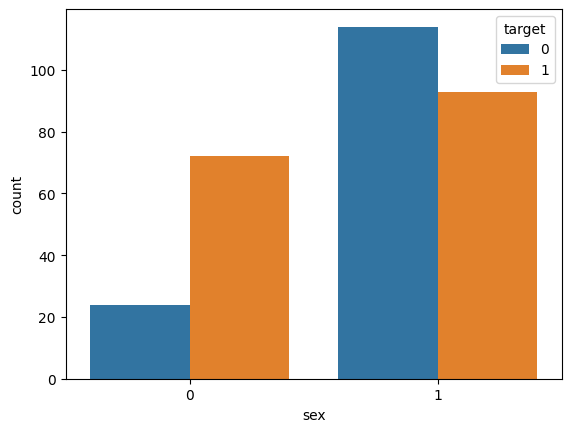

In [14]:
sns.countplot(x=data.sex,hue=data.target)
plt.show()

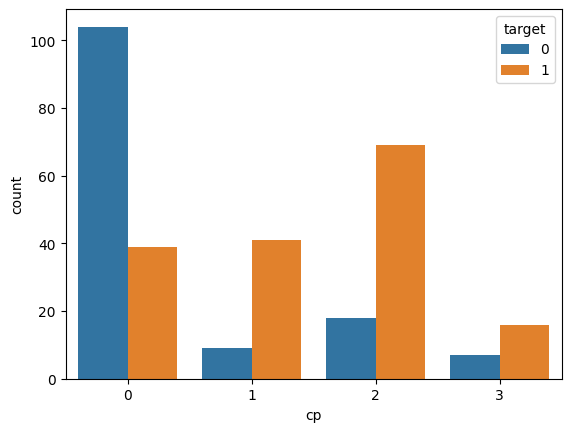

In [15]:
sns.countplot(x=data.cp,hue=data.target)
plt.show()

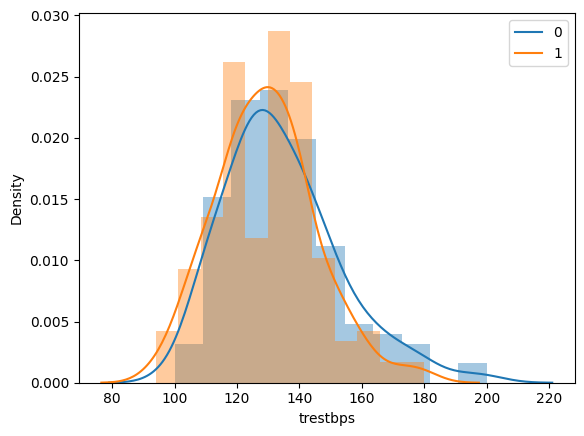

In [16]:
sns.distplot(data.trestbps[data.target==0])
sns.distplot(data.trestbps[data.target==1])
plt.legend(['0','1'])
plt.show()

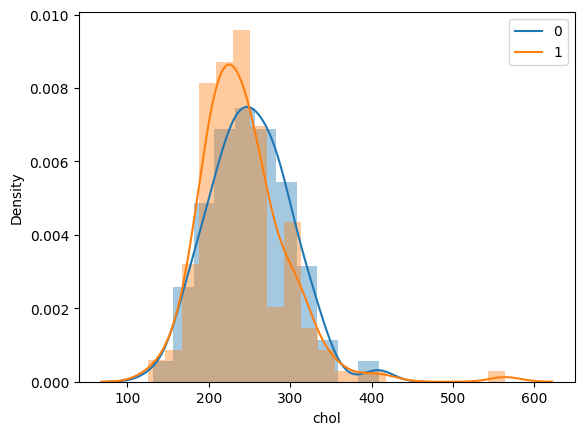

In [17]:
sns.distplot(data.chol[data.target==0])
sns.distplot(data.chol[data.target==1])
plt.legend(['0','1'])
plt.show()

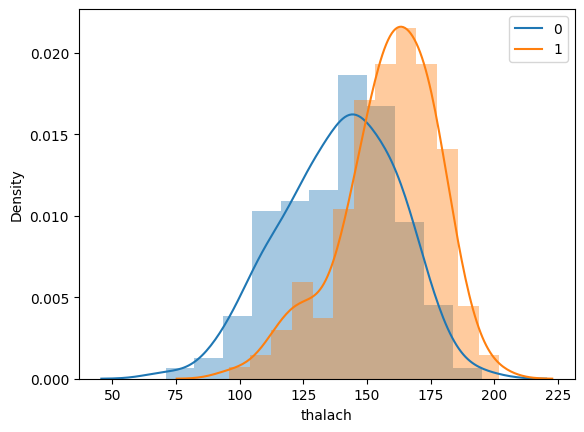

In [18]:
sns.distplot(data.thalach[data.target==0])
sns.distplot(data.thalach[data.target==1])
plt.legend(['0','1'])
plt.show()

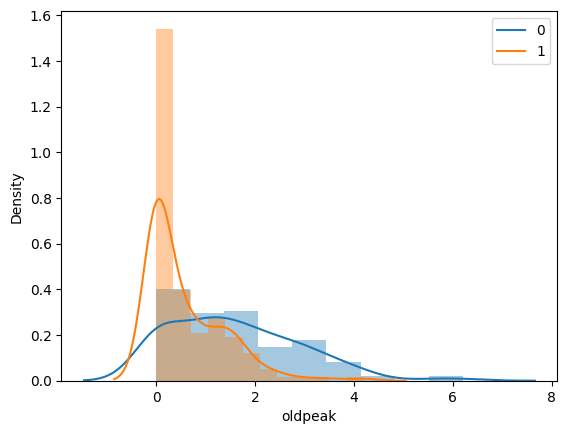

In [19]:
sns.distplot(data.oldpeak[data.target==0])
sns.distplot(data.oldpeak[data.target==1])
plt.legend(['0','1'])
plt.show()

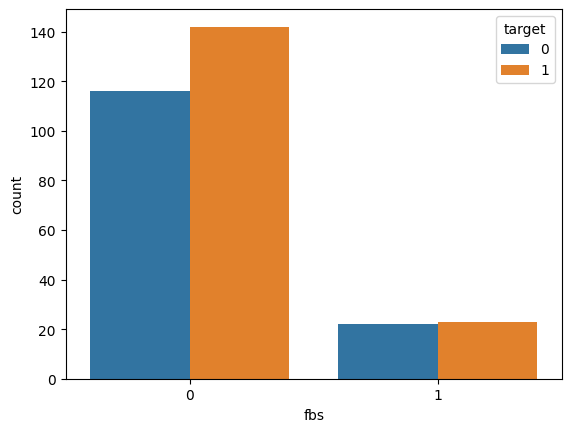

In [20]:
sns.countplot(x=data.fbs,hue=data.target)
plt.show()

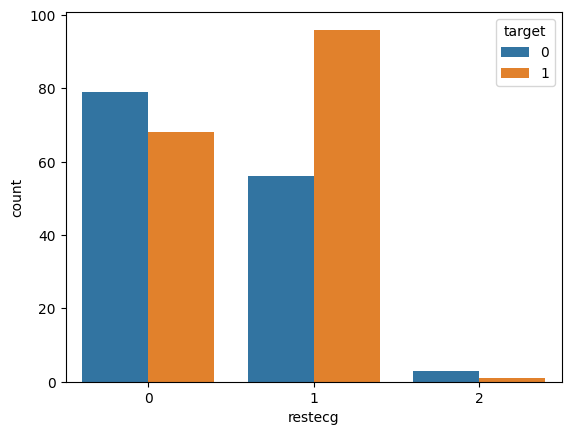

In [21]:
sns.countplot(x=data.restecg,hue=data.target)
plt.show()

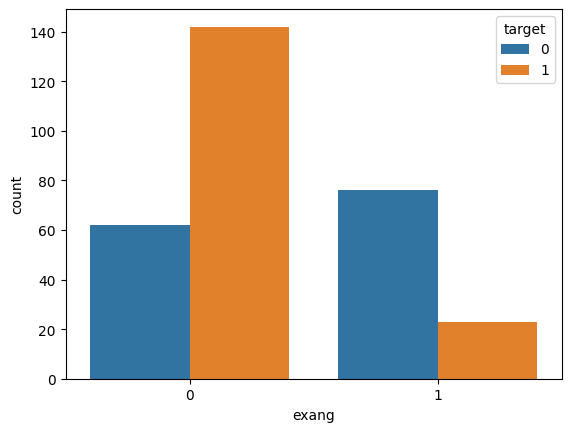

In [22]:
sns.countplot(x=data.exang,hue=data.target)
plt.show()

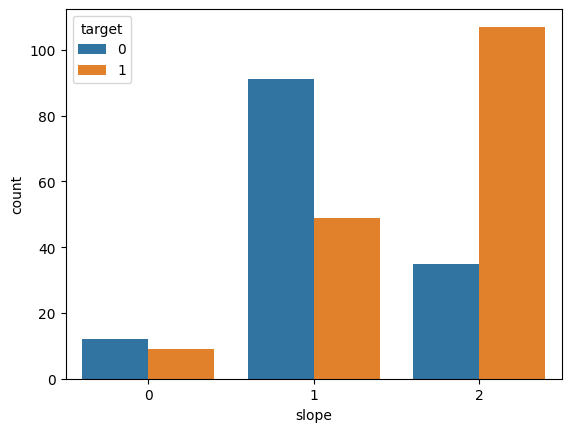

In [23]:
sns.countplot(x=data.slope,hue=data.target)
plt.show()

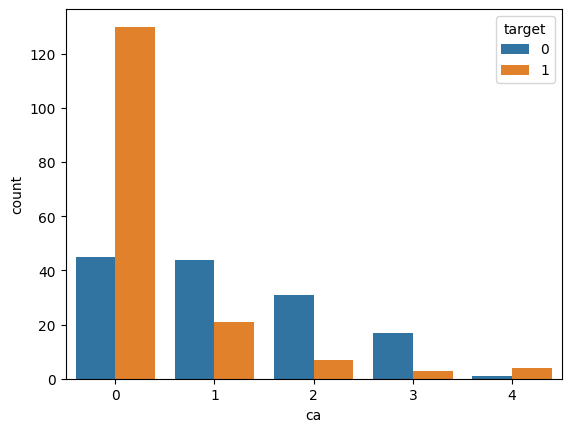

In [24]:
sns.countplot(x=data.ca,hue=data.target)
plt.show()

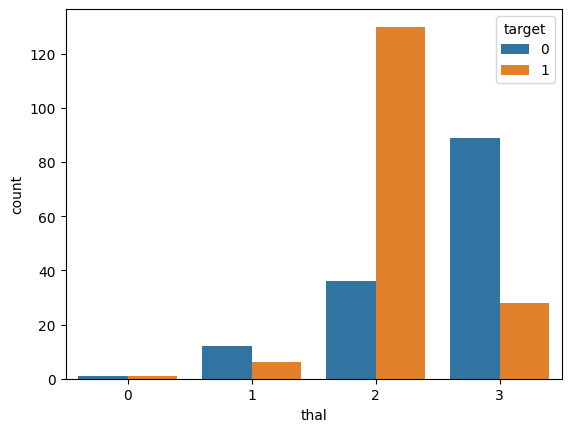

In [25]:
sns.countplot(x=data.thal,hue=data.target)
plt.show()

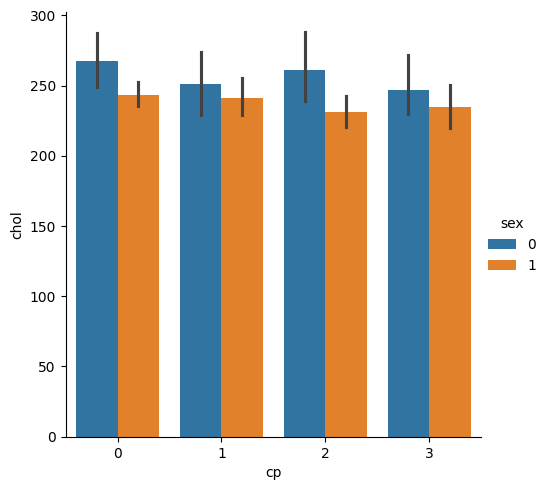

In [26]:
# sns.catplot(x="cp", y="chol",hue="sex",data=data, kind="bar", ci='sd')
sns.catplot(x="cp", y="chol",hue="sex",data=data, kind="bar")
plt.show()

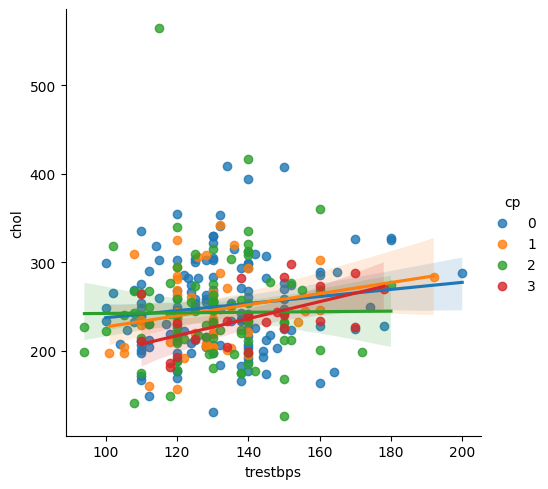

In [27]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="trestbps", y="chol",data=data,hue="cp")
plt.show()

# Logistic Regression

### - Description

- My understanding Logistic regression is a regression model where the dependent variable is categorical.

- The prediction will be 0 or 1, Yes or No

- Heart Disease dataset contain all numerical values

In [28]:
#input and output selection
ip=data.drop(['target'],axis=1)
op=data['target']

In [29]:
ip.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


### - Train & Test the Dataset

In [30]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(ip,op,test_size=0.3)

### - Scaling Dataset

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(xtr)
xtr=sc.transform(xtr)
xts=sc.transform(xts)

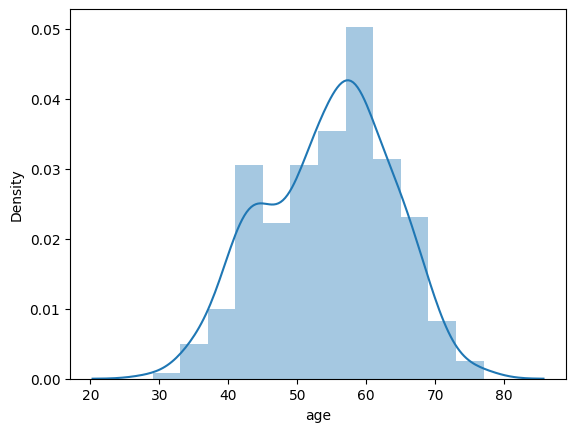

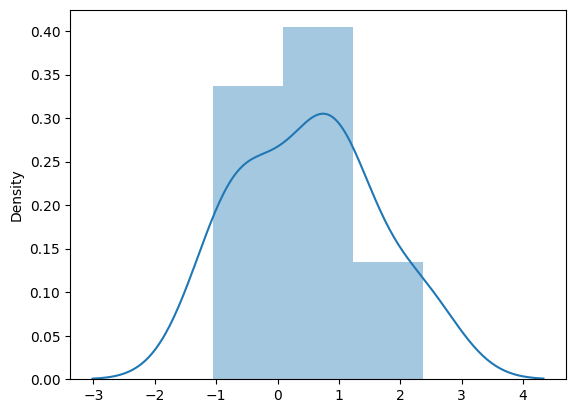

In [32]:
sns.distplot(ip.age)
plt.show()
sns.distplot(xtr[0])
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression
alg=LogisticRegression()

In [34]:
#train the algorithm with the training data
alg.fit(xtr,ytr)
yp=alg.predict(xts)

### - Checking the Accuacy of Model

In [35]:
from sklearn import metrics
cm=metrics.confusion_matrix(yts,yp)
print(cm)

[[25 18]
 [ 8 40]]


In [36]:
accuracy=metrics.accuracy_score(yts,yp)
print(accuracy)

0.7142857142857143


In [37]:
precission=metrics.precision_score(yts,yp)
print(precission)

0.6896551724137931


In [38]:
recall=metrics.recall_score(yts,yp)
print(recall)

0.8333333333333334


In [39]:
print(metrics.classification_report(yts, yp))

              precision    recall  f1-score   support

           0       0.76      0.58      0.66        43
           1       0.69      0.83      0.75        48

    accuracy                           0.71        91
   macro avg       0.72      0.71      0.71        91
weighted avg       0.72      0.71      0.71        91



# Naive Bayes classifier

### - Description

- It is easy and fast to predict class of test data set. It also perform well in multi class prediction

In [40]:
from sklearn.model_selection import train_test_split
# xtr,xts,ytr,yts=train_test_split(ip,op,test_size=0.2)
xtr,xts,ytr,yts=train_test_split(ip,op,test_size=0.3)

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(xtr)
xtr=sc.transform(xtr)
xts=sc.transform(xts)

In [42]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB.fit(xtr,ytr)
yp=GNB.predict(xts)

In [43]:
from sklearn import metrics
cm=metrics.confusion_matrix(yts,yp)
print(cm)

[[34  9]
 [ 8 40]]


In [44]:
accuracy=metrics.accuracy_score(yts,yp)
print(accuracy)

0.8131868131868132


In [45]:
precission=metrics.precision_score(yts,yp)
print(precission)

0.8163265306122449


In [46]:
recall=metrics.recall_score(yts,yp)
print(recall)

0.8333333333333334


In [47]:
print(metrics.classification_report(yts, yp))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        43
           1       0.82      0.83      0.82        48

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



# K-Nearest Neighbors

### - Description

- K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems

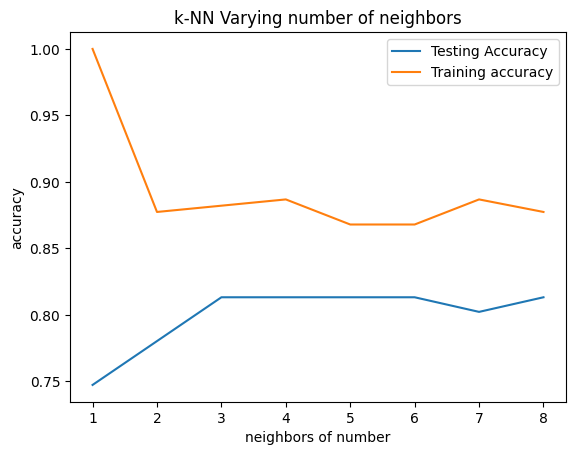

In [48]:
#KNN algorithm the nearest distance is calculated
from sklearn.neighbors import KNeighborsClassifier

neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtr,ytr)
    train_accuracy[i]=knn.score(xtr,ytr)
    test_accuracy[i]=knn.score(xts,yts)

plt.xlabel('neighbors of number')
plt.ylabel('accuracy')
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.show()


In [49]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(ip,op,test_size=0.3)

In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(xtr)
xtr=sc.transform(xtr)
xts=sc.transform(xts)

In [51]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(xtr,ytr)
yp=knn.predict(xts)

In [52]:
from sklearn import metrics
cm=metrics.confusion_matrix(yts,yp)
print(cm)

[[35  5]
 [13 38]]


In [53]:
accuracy=metrics.accuracy_score(yts,yp)
print(accuracy)

0.8021978021978022


In [54]:
precission=metrics.precision_score(yts,yp)
print(precission)

0.8837209302325582


In [55]:
# recall = metrics.recall_score(yts,yp,average='macro')
recall = metrics.recall_score(yts,yp)
print(recall)

0.7450980392156863


In [56]:
print(metrics.classification_report(yts, yp))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        40
           1       0.88      0.75      0.81        51

    accuracy                           0.80        91
   macro avg       0.81      0.81      0.80        91
weighted avg       0.82      0.80      0.80        91



# Support Vector Machines-SVM

### - Description

- Support vector machines (SVMs) are powerful yet flexible supervised machine learning algorithms which are used both for classification and regression

In [57]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(ip,op,test_size=0.3)

In [58]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(xtr)
xtr=sc.transform(xtr)
xts=sc.transform(xts)

In [59]:
from sklearn import svm

alg=svm.SVC(C=30,gamma=0.03)

#train the algorithm with training data
alg.fit(xtr,ytr)
yp=alg.predict(xts)

In [60]:
from sklearn import metrics
cm=metrics.confusion_matrix(yts,yp)
print(cm)

[[30  7]
 [14 40]]


In [61]:
from sklearn import metrics
accuracy=metrics.accuracy_score(yts,yp)
print(accuracy)

0.7692307692307693


In [62]:
precission=metrics.precision_score(yts,yp)
print(precission)

0.851063829787234


In [63]:
recall = metrics.recall_score(yts,yp)
print(recall)

0.7407407407407407


In [64]:
print(metrics.classification_report(yts, yp))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74        37
           1       0.85      0.74      0.79        54

    accuracy                           0.77        91
   macro avg       0.77      0.78      0.77        91
weighted avg       0.78      0.77      0.77        91

